# Trabajo Práctico 1
## TEORÍA DE ERRORES

## Ejercicio 2) ## 

La serie infinita $f(n)=\sum_{k=1}^n(1/i^4)$ converge a  un valor de $pi^4/90$ conforme n tiende a infinito. 

+ Escriba un programa de simple precisión para calcular f(n) para n=10000 por medio del cálculo de la suma desde i = 1 hasta 10000. Después realice el cálculo en sentido inverso. Modularice su trabajo.
+ En cada caso, calcule el error relativo. 
+ Explique los resultados. 


Nota: Investigue sobre los distintos tipos de precisión que permite Python usando Numpy.

In [2]:
import numpy as np

x1 = np.linspace(1,10000,10000)
x2 = np.flipud(x1)  #revertir arreglo

y1 = np.single(1) / (np.single(x1)) ** np.single(4)
y2 = np.single(1) / (np.single(x2)) ** np.single(4)

suma1 = y1.sum()
suma2 = y2.sum()

real = (np.pi ** 4) / 90

error1 = (real - suma1) / real * 100
error2 = (real - suma2) / real * 100 # error 2 -> suma revertido

print("Suma ascendente:  ", suma1)
print("Suma descendente: ", suma2)

print("\nValor verdadero:  ", '{:.7f}'.format(real))

print("\nError relativo asc. : ", '{:.6f}'.format(error1), "%")
print("Error relativo desc.: ", '{:.6f}'.format(error2), "%")



Suma ascendente:   1.0823228
Suma descendente:  1.0823231

Valor verdadero:   1.0823232

Error relativo asc. :  0.000037 %
Error relativo desc.:  0.000015 %


+  A medida que se opera con números con coma flotante se introduce un error de representación porque hay números decimales (irracionales o racionales) que no tienen una representación finita en binario, por lo que la máquina redondea al número de cifras significativas con una presición dada por el número de mantisa.
+  La suma en orden creciente de $(1/i^4)$, es decir, sumando primero los números más grandes, tiene mayor error que al sumar primero los números más chicos. Esto se interpreta de manera similar al ejercicio anterior: hay mayor precisión al representar números pequeños que números grandes. por lo tanto se comete menor error de representación si tenemos más operaciones con números pequeños y mayor error con operaciones con números grandes. 
+  Tipos de precisión: https://numpy.org/doc/stable/user/basics.types.html
+  Límites de la máquina para los tipos de punto flotante: https://runebook.dev/es/docs/numpy/reference/generated/numpy.finfo
+  y1 = np.float32(1) / (np.float32(x1)) ** np.float32(4) (otra forma de expresar)

## Ejercicio 4) ## 

4) Considere la función: $f(x)=\frac{e^x-e^{-x}}{2x}$, para $x\neq0$

  a) Calcule el $\lim_{x\to0}f(x)$ analíticamente.

  b) Calcule numéricamente con un programa en Python. ¿Qué ocurre cuando se intenta evaluar la función para valores de x pequeños? Considere $f(x)$ para $x=10^{-n}$ , con $n = 1, ..., 20.$


In [14]:
import numpy as np

for n in range(1,21):
    x=10**(-n)
    y=(np.e**x-np.e**(-x))/(2*x)
    print('{:<4s}{:<5d}{:<34.28f}{:<6s}{:<34.28f}{:<7s}{:<34.28f}'.format("n =", n, y, "e^x = ", np.e**(x), "e^-x = ", np.e**(-x)))

n = 1    1.0016675001984409743016612993    e^x = 1.1051709180756477124418779567    e^-x = 0.9048374180359595175815456969    
n = 2    1.0000166667499921224759873439    e^x = 1.0100501670841679491275044711    e^-x = 0.9900498337491681066779847242    
n = 3    1.0000001666666813449069195485    e^x = 1.0010005001667083845973138523    e^-x = 0.9990004998333750219075000132    
n = 4    1.0000000016668897373506297299    e^x = 1.0001000050001667140975314396    e^-x = 0.9999000049998333361500613137    
n = 5    1.0000000000121023191468339064    e^x = 1.0000100000500000696490587870    e^-x = 0.9999900000499998276026758504    
n = 6    0.9999999999732445132849534275    e^x = 1.0000010000004999621836532242    e^-x = 0.9999990000005000156946266543    
n = 7    0.9999999994736441522036329843    e^x = 1.0000001000000049433680260336    e^-x = 0.9999999000000050486391955928    
n = 8    0.9999999939225290290778502822    e^x = 1.0000000099999999392252902908    e^-x = 0.9999999900000000607747097092    


+  Por defecto se trabaja con dole precisión, esto es, con una mantisa de 52 bits. 
+  Cuando el valor de x se aproxima a 1 (por izquierda o por derecha), llega a un punto donde no se puede representar con tanta precisión el resultado y es redondeado (underflow).
+  Para ver la conversión a formato IEEE754 con doble precisión: https://www.zator.com/Cpp/E2_2_4a1.htm

In [58]:
x = 10**(-15)
print("e^(10E-15) =")
print('{:.60f}'.format(np.e**(x)))
print('1.000000000000000000000000000000000000000000000000010100000000') #https://www.zator.com/Cpp/E2_2_4a1.htm
print('{:>54s}'.format("↑"))
print('{:>54s}'.format("52 cifras significativas"))

x = 10**(-16)
print("e^(-10E-16) =")
print('{:.60f}'.format(np.e**(-x)))
print('0.111111111111111111111111111111111111111111111111111110000000') #https://www.zator.com/Cpp/E2_2_4a1.htm

e^(10E-15) =
1.000000000000001110223024625156540423631668090820312500000000
1.000000000000000000000000000000000000000000000000010100000000
                                                     ↑
                              52 cifras significativas
e^(-10E-16) =
0.999999999999999888977697537484345957636833190917968750000000
0.111111111111111111111111111111111111111111111111111110000000


## Ejercicio 5) ## 
Escriba en Python un programa para calcular:

$f(x) = x^8 − 8𝑥^7 + 28𝑥^6 − 56𝑥^5 + 70𝑥^4 − 56𝑥^3 + 28𝑥^2 − 8𝑥 + 1$

$g(x) = (𝑥 − 1)^8$

en puntos igualmente espaciados sobre el intervalo [0.999, 1.001]. 

Grafique f(x) y g(x).

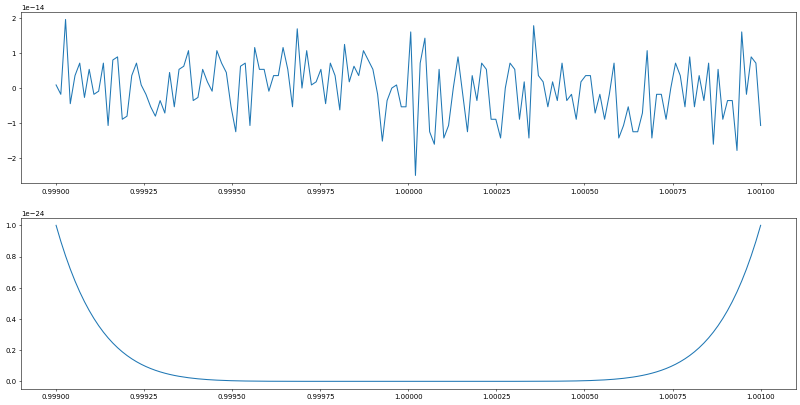

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0.999,1.001,150)

f = x**8 - 8*(x**7) + 28*(x**6) - 56*(x**5) + 70*(x**4) - 56*(x**3) + 28*(x**2) - 8*x + 1

g = (x-1)**8

# plt.plot(x,f)
# plt.plot(x,g)
# plt.legend(('f(x)','g(x)'), loc='upper left')

plt.figure(1, (20,10), 50)

plt.subplot(2,1,1)
plt.plot(x,f)

plt.subplot(2,1,2)
plt.plot(x,g)


+ Ambas funciones son equivalentes. Tienen 8 ceros repetidos en 1, por lo tanto ambas gráficas deberían ser idénticas, cortando por el eje x en un sólo punto.

+ f(x) presenta un error de representación, es decir que, en algunas operaciones hubo underflow. La curva tiene valores negativos, el resultado de la resta no pudo ser representable con suficiente precisión.

        ERROR DE SIGNIFICACIÓN. En este caso, cuando se restan cantidades muy próximas entre si, se pierden cifras significativas.

+ Una posible solución sería usar el algoritmo de Horner para reducir el número de operaciones.

In [7]:
#con una menor precisión se pierden valores próximos a 1
h = (np.half(x)-np.half(1))**np.half(8)
print(h)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


## Ejercicio 6)
Usando Python realice la siguiente suma:

$S = 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1$

¿El resultado obtenido es correcto?, caso contrario explique qué está sucediendo y como podría
obtener la solución correcta.

In [42]:
s = 0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1
print(s)

suma = 0.1*10
print(suma)

0.9999999999999999
1.0


+ El número 0.1 no se puede representar en binario de forma exacta puesto que la conversión tiende al infinito en periódico mixto. Por lo que la máquina redondea a 53 bits significativos (doble precisión).
+ Por lo tanto con cada operación se contribuye al error de representación del resultado aproximado.

In [66]:
import decimal as dc

print(dc.Decimal(0.1))
print(dc.Decimal(0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1))

0.1000000000000000055511151231257827021181583404541015625
0.99999999999999988897769753748434595763683319091796875


## Ejercicio 7)
Utilizando la función round, pruebe redondear los valores 3.45 y 5.55 con 1 cifra decimal. ¿Obtiene
los valores esperados? En Python, verifique los valores representados en la mantisa utilizando la
función Decimal de la librería decimal.

In [13]:
import decimal as dc

a=round(3.45,1)
b=round(5.55,1)
print(a, " y ", b)

a=dc.Decimal(3.45)
print(a)
b=dc.Decimal(5.55)
print(b)

3.5  y  5.5
3.45000000000000017763568394002504646778106689453125
5.54999999999999982236431605997495353221893310546875


$5.55\neq5.5$
+ Los números son almacenados con una mantisa normalizada (en binario), cuando vemos la equivalencia de esa representación en decimal observamos por qué se redondea "incorrectamente" el segundo número.